In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import numpy as np

In [2]:
folder_path = './Sales_Product'
# Read all CSV files into DataFrames
dataframes = [pd.read_csv(os.path.join(folder_path, file)) for file in os.listdir(folder_path)]
# Concatenate DataFrames
merged_data = pd.concat(dataframes, ignore_index=True)
# Save merged data to a new CSV file
merged_data.to_csv('all_sales.csv', index=False)

In [3]:
all_data = pd.read_csv('all_sales.csv')
all_data.head()
# Creating a copy for dataframe
df_original_file = all_data.copy()

In [4]:
# Info of the dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
# display the first 5 rows of data
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [6]:
# display the last 5 rows of data
all_data.tail() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
186849,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


In [7]:
# Checking for NULl value
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# NULL values  percentage 
percent_missing = (all_data.isnull().sum() / len(all_data) * 100).round(2)
df_missing = pd.DataFrame({'% of Missing Values' :percent_missing})
df_missing

,% of Missing Values
Order ID,0.29
Product,0.29
Quantity Ordered,0.29
Price Each,0.29
Order Date,0.29
Purchase Address,0.29


Clean the data

In [9]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [10]:
# Checking null values after cleaning
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
# Display unique values
all_data['Quantity Ordered'].unique()

array(['1', '2', '4', '3', 'Quantity Ordered', '7', '5', '6', '8', '9'],
      dtype=object)

In [14]:
# Create filter to drop text values
filter_text = all_data['Quantity Ordered'] != 'Quantity Ordered'
# Replace data without text values
all_data = all_data[filter_text]

In [15]:
# Convert 'Quantity Ordered' and 'Price Each'  to  numeric integer
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int64')
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


In [16]:
#Convert 'Order Date' to datetime format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

/var/folders/tz/36qz0vtn4rb0h9dh9ghf_dpr0000gp/T/ipykernel_2312/3007884871.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [17]:
# Confirm data type changes
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [18]:
# Add a new 'Month' column
all_data['Month'] =pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12


In [19]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data['State'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[2].split()[0])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City,NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City,NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City,NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco,CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta,GA


In [21]:
# Add the Hour column
all_data['Hour'] = all_data['Order Date'].dt.hour 
# Add the Minute column
all_data['Minute'] = all_data['Order Date'].dt.minute 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City,NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City,NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City,NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco,CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta,GA,12,38


In [22]:
# ADD sale (Quantity ordered * Price each) 
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each'] 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Hour,Minute,Sales
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City,NY,0,1,1700.00
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City,NY,7,3,600.00
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City,NY,18,21,11.95
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco,CA,15,13,149.99
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta,GA,12,38,11.95


Data Exploration
What is the average sales by month?

In [23]:
# CALCULATE REVENUE
all_data['Revenue'] = all_data['Quantity Ordered'] * all_data['Price Each']

# CALCULATE AVERAGE SALES BY MONTH
avg_month_sales = all_data.groupby('Month').agg({'Revenue': 'mean'})

# CONFIRMING RESULTS
print('Average Sales by Month Millions:\n', avg_month_sales)

Average Sales by Month Millions:
           Revenue
Month            
1      187.687376
2      183.884962
3      185.250471
4      185.495390
5      190.305852
6      190.187565
7      185.249826
8      187.648849
9      180.497387
10     184.238580
11     182.074956
12     184.655913


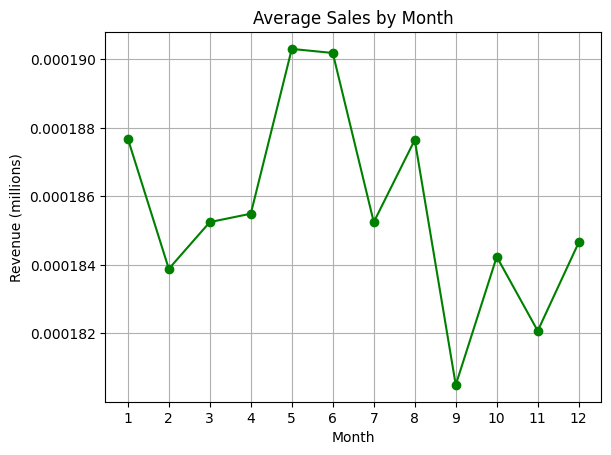

In [61]:
# Calculate average sales by month
avg_month_sales = all_data.groupby('Month').agg({'Revenue': 'mean'})

# Convert revenue to millions
avg_month_sales['Revenue'] = avg_month_sales['Revenue'] / 1000000

# Create a line plot
plt.plot(avg_month_sales.index, avg_month_sales['Revenue'], marker='o', color = 'Green')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Revenue (millions)')
plt.xticks(avg_month_sales.index)
plt.grid(True)
plt.show()

What are 10 top states that sold the most products?

In [29]:
state_sales = all_data.groupby('State')['Quantity Ordered'].sum()

# Sort the states based on total sales quantities in descending order
sorted_states = state_sales.sort_values(ascending=False)

# Display the top states that sold the most products
top_states = sorted_states.head(10)  # You can adjust the number of top states to display
print(top_states)

State
CA    83528
NY    27932
TX    27883
MA    22528
GA    16602
WA    16553
OR    11303
ME     2750
Name: Quantity Ordered, dtype: int64


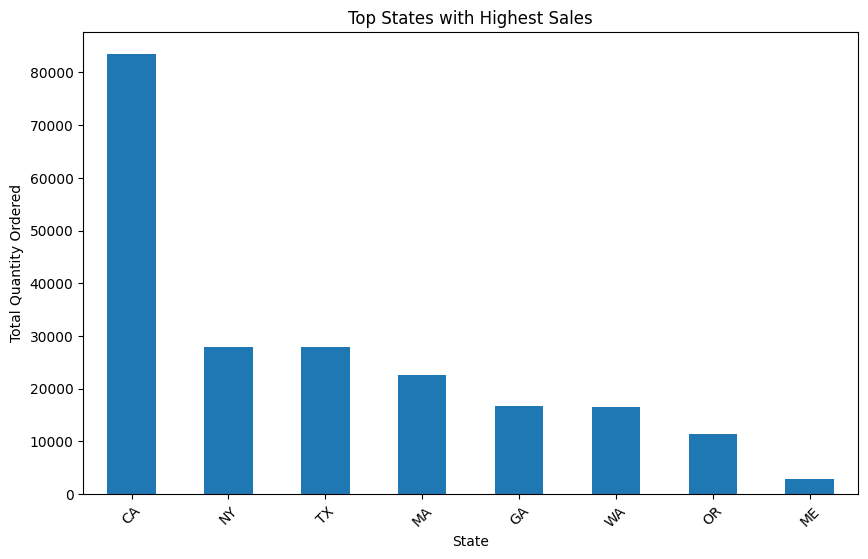

In [30]:
import matplotlib.pyplot as plt

sorted_states = state_sales.sort_values(ascending=False)

# Display the top states that sold the most products
top_states = sorted_states.head(10)
# Create a bar plot
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar')
plt.title('Top States with Highest Sales')
plt.xlabel('State')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.show()

Which Products sell best?

In [28]:
product_sales = all_data.groupby('Product')['Quantity Ordered'].sum()
# Display the list of products
product_list = product_sales.index.tolist()
for idx, product in enumerate(product_list, start=1):
    print(f"{idx}. {product}")

1. 20in Monitor
2. 27in 4K Gaming Monitor
3. 27in FHD Monitor
4. 34in Ultrawide Monitor
5. AA Batteries (4-pack)
6. AAA Batteries (4-pack)
7. Apple Airpods Headphones
8. Bose SoundSport Headphones
9. Flatscreen TV
10. Google Phone
11. LG Dryer
12. LG Washing Machine
13. Lightning Charging Cable
14. Macbook Pro Laptop
15. ThinkPad Laptop
16. USB-C Charging Cable
17. Vareebadd Phone
18. Wired Headphones
19. iPhone


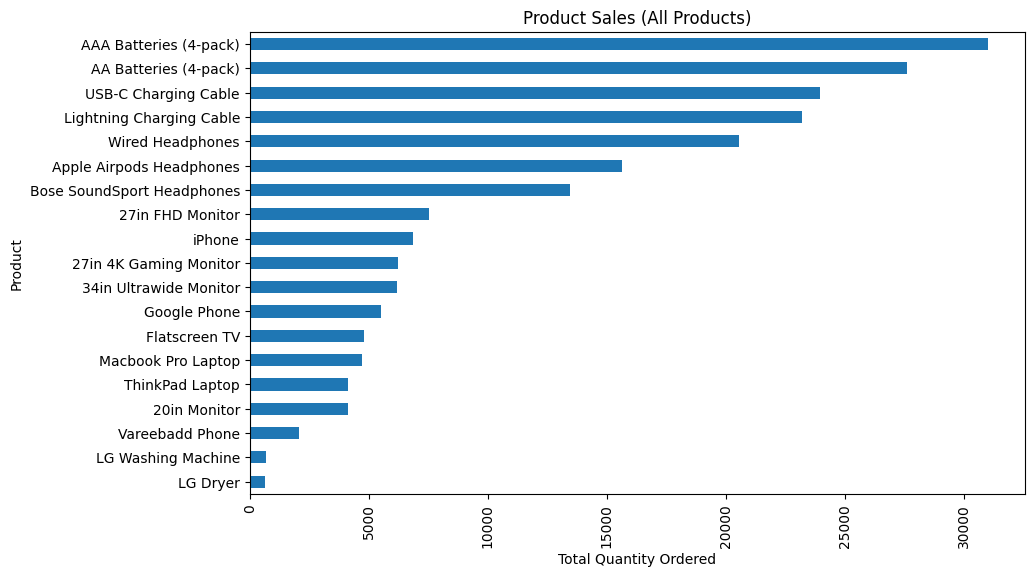

In [60]:
# Create a bar plot of product sales for all products
plt.figure(figsize=(10, 6))
product_sales.sort_values(ascending=False).plot(kind='barh')
plt.title('Product Sales (All Products)')
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Product')
plt.xticks(rotation=90)
plt.gca().invert_yaxis()
plt.show()

What products are most sold together?

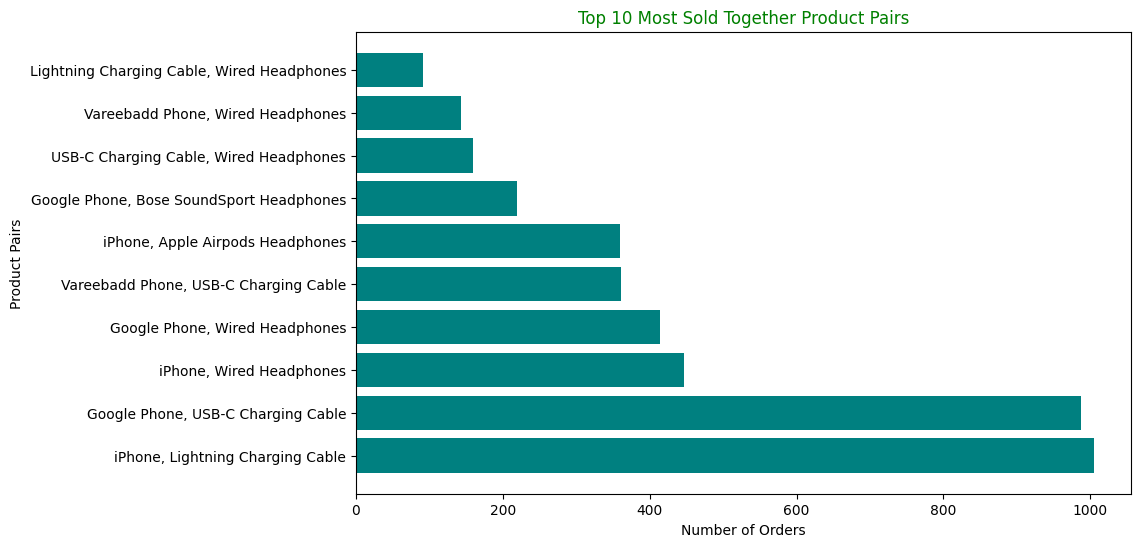

In [59]:
# Create a copy of the slice of sales_data
data = all_data[all_data['Order ID'].duplicated(keep=False)].copy()

# Create a new column
data['Grouped'] = all_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Create a new DataFrame with unique Order IDs and grouped products
data = data[['Order ID', 'Grouped']].drop_duplicates()

# Create a Counter object to count pairs of products
count = Counter()

# Count the pairs of products
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# Create a bar chart of the top 10 most commonly sold together products
top_items = count.most_common(10)
item_pairs = [', '.join(pair) for pair, count in top_items]
item_counts = [count for pair, count in top_items]

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(item_pairs, item_counts, color='Teal')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Product Pairs')
ax.set_title('Top 10 Most Sold Together Product Pairs', color='Green')

plt.show()

What timing should be targeted for displaying ads in order to increase the probability of customers making a purchase?

In [47]:
# Extract hour from 'Order Date'
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Hour,Minute,Sales,Revenue,Count
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,New York City,NY,0,1,1700.00,1700.00,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,New York City,NY,7,3,600.00,600.00,1
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,New York City,NY,18,21,11.95,11.95,1
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,San Francisco,CA,15,13,149.99,149.99,1
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,Atlanta,GA,12,38,11.95,11.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,Boston,MA,19,2,2.99,2.99,1
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,New York City,NY,19,29,149.99,149.99,1
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,San Francisco,CA,18,57,11.95,11.95,1
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,San Francisco,CA,18,35,11.95,11.95,1


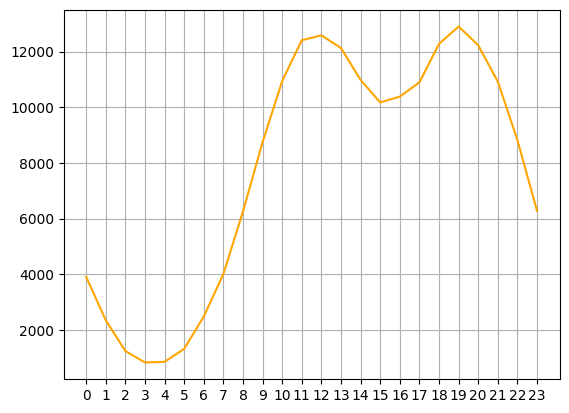

In [53]:
keys = np.ravel([pair for pair, df in all_data.groupby(['Hour'])])

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'], color='orange')
plt.xticks(keys)# Flattened keys array
plt.grid(True)
plt.show()

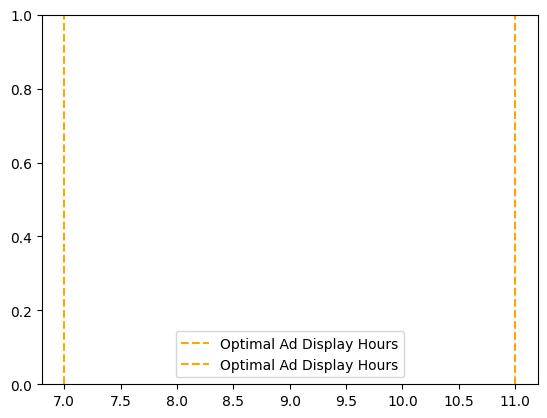

The best timing for displaying ads is between 11 AM to 7 AM.


In [58]:
# Identify peak hours
peak_hours = [11, 7]
peak_time_range = f"{peak_hours[0]} AM to {peak_hours[1]} AM"

# Highlight peak hours with vertical lines
for hour in peak_hours:
    plt.axvline(x=hour, color='orange', linestyle='--', label='Optimal Ad Display Hours')
# Show legend with label for optimal ad display hours
plt.legend()
# Display the plot
plt.show()
print(f"The best timing for displaying ads is between {peak_time_range}.")